In [1]:
import pandas as pd
import datetime as DT
import numpy as np
import matplotlib.pyplot as plt 

# Customer Demographics

Upon loading the dataset, we see that the first row is just a notice. Hence, we skip it while reading it. 

Then, we check its shape to see the number of rows and columns (features). Next, we check if there are duplicates for the customer id field. Luckily, there are none.

The default columns seems quite absurd and useless. It's best to drop it in the early stage.

In [2]:
df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name=3, skiprows=1)

rows = df.shape[0]
cols = df.shape[1]
print("Number of Customer Id Entries: ", rows)
print("Number of Features: ", cols, "\n" )

print("Number of Duplicates", len(df['customer_id'])-len(df['customer_id'].drop_duplicates()))

df = df.drop(['default'], axis=1)
df.head()


Number of Customer Id Entries:  4000
Number of Features:  13 

Number of Duplicates 0


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


## Checking for Null Values

Now, we check the number of null values in all columns. We observe that there are around 125 N/A values for the last name. However, since last names might not have any impact on our business strategy, we can choose to ignore that column. However, DOB is a valuable asset for us. Hence, we drop the rows which have null values for the DOB.

Similarly, job titles could also be useful for us. Hence, we drop the rows which have null values for the job title as well.

In [3]:
print("Number of Initial Null Values: ")
print(df.isnull().sum(axis = 0),"\n")

df = df[df['DOB'].notnull()]
df = df[df['job_title'].notnull()]

Number of Initial Null Values: 
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64 



## Customer Ages

When preparing business and marketing strategies, targeting the right age bracket is quite essential. Hence, we need to know the exact ages of our customers. For this, we can add a new column for customer ages. We can calculate ages by subtracting the DOB from the current date. 

In [4]:
now = pd.Timestamp('now')
df['age'] = (now - df['DOB']).astype('<m8[Y]')
df['age'] = df['age'].astype(np.int64)
df = df.reset_index(drop = True)
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43
4,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,58


## Removing Contradiction in Genders

We notice that the values in the gender column are not consistent. By looking at the value counts, we observe that F and Female both represent the same thing. Similarly, M and Male represent the same thing. Additionally, terms U and Femal are also present in the dataset.

To fix this, we can replace Female/Femal with F and Male with M everywhere. Then, we can get rid of the row where gender is undefined (U). After this, the dataset seems to look good to go. 


In [5]:
print(df.gender.value_counts(),"\n")
df["gender"].replace({"Female": "F", "Male": "M", "Femal": "F"}, inplace=True)

Female    1769
Male      1643
F            1
M            1
U            1
Femal        1
Name: gender, dtype: int64 



## Visualizing Purchases Based on Gender

First we plot a bar chart of number of purchases according to different genders. Since the value for U is really small, we can drop that value and then visualize again.

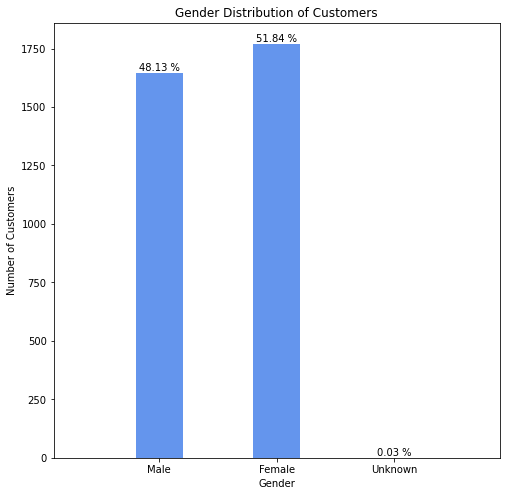

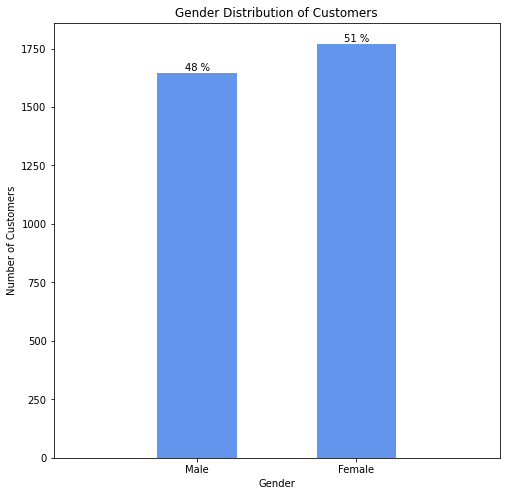

In [6]:
total = df.gender.size
females = (df.gender == "F").sum()
males = (df.gender == "M").sum()
unknown = (df.gender == "U").sum()

gender = ['Male', 'Female', 'Unknown']
numbers = [males, females, unknown]

plt.figure(figsize=(8,8))
bars = plt.bar(gender, numbers, width=0.4, bottom=None, align='center', data=None, color='cornflowerblue')
plt.xlim(-0.9, len(gender) - 1 + 0.9)
for i in range(len(numbers)):
    percentage = ((numbers[i]/total)*100)
    percentage = str(round(percentage,2)) + " %"
    plt.annotate(percentage, xy=(gender[i], numbers[i] + 10), ha='center')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution of Customers')
plt.show()

df = df[df['gender'] != "U"]

females = (df.gender == "F").sum()
males = (df.gender == "M").sum()

gender = ['Male', 'Female']
numbers = [males, females]

plt.figure(figsize=(8,8))
bars = plt.bar(gender, numbers, width=0.5, bottom=None, align='center', data=None, color='cornflowerblue')
plt.xlim(-0.9, len(gender) - 1 + 0.9)
for i in range(len(numbers)):
    percentage = ((numbers[i]/(total-1))*100)
    percentage = str(int(percentage)) + " %"
    plt.annotate(percentage, xy=(gender[i], numbers[i] + 10), ha='center')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution of Customers')
plt.show()

## Visualizing Purchases Based on Age Groups

First we check the average age. Then, we plot a bar chart to see how the number of purchases are distributed amongst different age groups.

Average Age 42


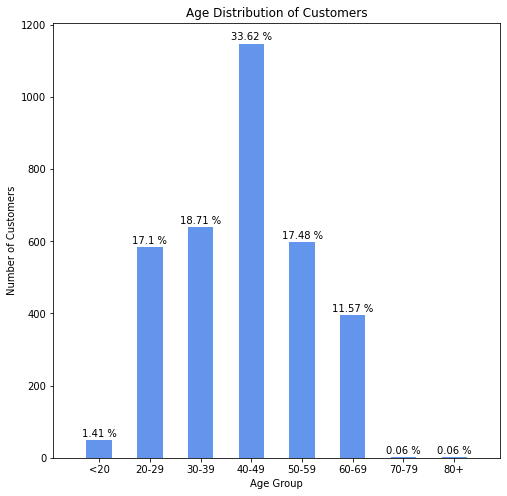

In [7]:
print("Average Age" , int(df.age.mean()))

under20 = 0
_20To30 = 0
_30To40 = 0
_40To50 = 0
_50To60 = 0
_60To70 = 0
_70To80 = 0
above80 = 0

size = df.gender.size

for value in df['age']:
   if(value<20):
    under20+=1
   elif (value >=20 and value <30):
    _20To30 += 1
   elif (value >= 30 and value <40):
    _30To40 += 1
   elif (value >= 40 and value <50):
    _40To50 += 1
   elif (value >= 50 and value <60):
    _50To60 += 1
   elif (value >= 60 and value <70):
    _60To70 += 1
   elif (value >= 70 and value <80):
    _70To80 += 1
   else:
    above80 += 1

    
ageGroups = ['<20','20-29', '30-39','40-49','50-59','60-69','70-79','80+']
numbers = [under20, _20To30, _30To40, _40To50, _50To60, _60To70, _70To80, above80]

plt.figure(figsize=(8,8))
bars = plt.bar(ageGroups, numbers, width=0.5, bottom=None, align='center', data=None, color='cornflowerblue')
plt.xlim(-0.9, len(ageGroups) - 1 + 0.9)
for i in range(len(numbers)):
    percentage = ((numbers[i]/(size))*100)
    percentage = str(round(percentage,2)) + " %"
    plt.annotate(percentage, xy=(ageGroups[i], numbers[i] + 10), ha='center')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Age Distribution of Customers')
plt.show()

## Visualizing Purchases Based on Gender & Age Groups

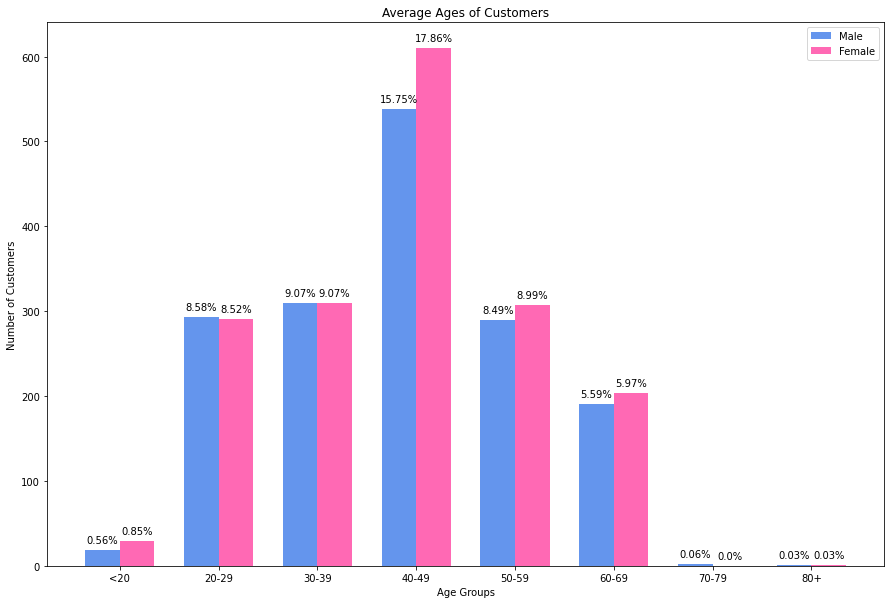

In [8]:
femalesUnder20 = 0
females20To30 = 0
females30To40 = 0
females40To50 = 0
females50To60 = 0
females60To70 = 0
females70To80 = 0
femalesAbove80 = 0

femaleAgesData = df[df['gender']=="F"]

for value in femaleAgesData['age']:
   if(value<20):
    femalesUnder20+=1
   elif (value >=20 and value <30):
    females20To30 += 1
   elif (value >= 30 and value <40):
    females30To40 += 1
   elif (value >= 40 and value <50):
    females40To50 += 1
   elif (value >= 50 and value <60):
    females50To60 += 1
   elif (value >= 60 and value <70):
    females60To70 += 1
   elif (value >= 70 and value <80):
    females70To80 += 1
   else:
    femalesAbove80 += 1


malesUnder20 = 0
males20To30 = 0
males30To40 = 0
males40To50 = 0
males50To60 = 0
males60To70 = 0
males70To80 = 0
malesAbove80 = 0
    
maleAgesData = df[df['gender']=="M"]

for value in maleAgesData['age']:
   if(value<20):
    malesUnder20+=1
   elif (value >=20 and value <30):
    males20To30 += 1
   elif (value >= 30 and value <40):
    males30To40 += 1
   elif (value >= 40 and value <50):
    males40To50 += 1
   elif (value >= 50 and value <60):
    males50To60 += 1
   elif (value >= 60 and value <70):
    males60To70 += 1
   elif (value >= 70 and value <80):
    males70To80 += 1
   else:
    malesAbove80 += 1

N = 8
labels = ['<20','20-29', '30-39','40-49','50-59','60-69','70-79','80+']
maleAges = (malesUnder20, males20To30, males30To40, males40To50, males50To60, males60To70, males70To80,malesAbove80)
femaleAges = (femalesUnder20, females20To30,males30To40, females40To50, females50To60, females60To70, females70To80,femalesAbove80)
ind = np.arange(N) 
width = 0.35  


figure, axes = plt.subplots()
figure.set_size_inches(15, 10, forward=True)
plt.bar(ind, maleAges , width, label='Male', color='cornflowerblue')
plt.bar(ind + width, femaleAges, width, label='Female', color='hotpink')

plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.title('Average Ages of Customers')

plt.xticks(ind + width / 2,  ('<20','20-29', '30-39','40-49','50-59','60-69','70-79','80+'))

for p in axes.patches:
    axes.annotate(f'{np.round((p.get_height()/total)*100, decimals=2)}%',
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
    
plt.legend(loc='best')
plt.show()

## Visualizing Purchases Based on Industries

Manufacturing         695
Financial Services    682
Health                543
Retail                305
Property              231
IT                    126
Entertainment         122
Argiculture            99
Telecommunications     61
Name: job_industry_category, dtype: int64 



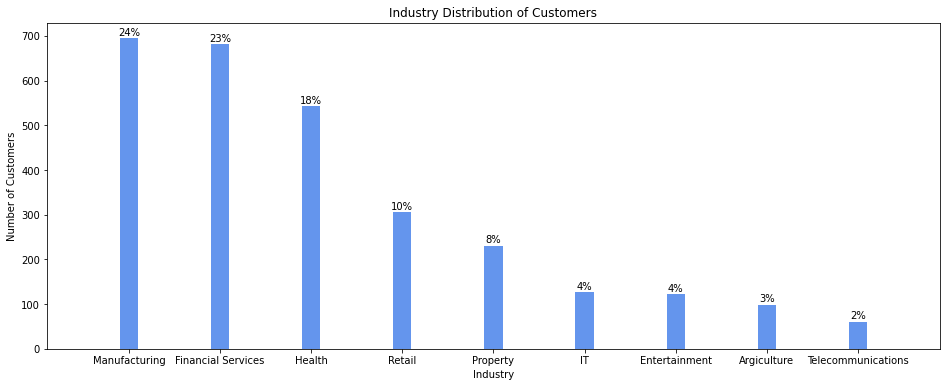

In [9]:
print(df.job_industry_category.value_counts(),"\n")

total = df.job_industry_category.size
null_values = sum(pd.isnull(df['job_industry_category']))
total = total-null_values

industries = (df['job_industry_category'].sort_values()).value_counts().keys().tolist()
counts = (df['job_industry_category'].sort_values()).value_counts().tolist()

data = sorted(zip(industries, counts), key=lambda v: v[1], reverse=True)

plt.figure(figsize=(16, 6))
for (i, c) in data: 
    bars = plt.bar(i, c, width=0.2, bottom=None, align='center', data=None, color='cornflowerblue')
    plt.annotate(f'{int((c/total)*100)}%\n', xy=(i, c), va='center', ha='center')
plt.xlim(-0.9, len(industries) - 1 + 0.9)
plt.xlabel('Industry')
plt.ylabel('Number of Customers')
plt.title('Industry Distribution of Customers')
plt.show()

## Visualizing Purchases Based on Wealth Segments

Mass Customer        1695
High Net Worth        871
Affluent Customer     849
Name: wealth_segment, dtype: int64 



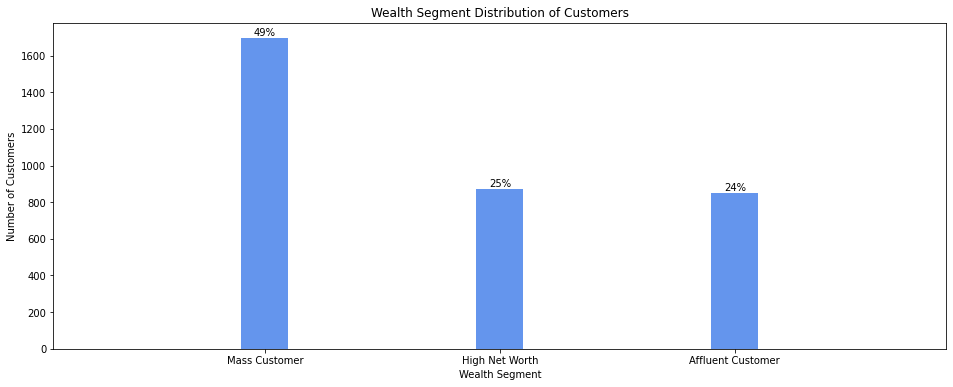

In [10]:
print(df.wealth_segment.value_counts(),"\n")

total = df.wealth_segment.size
null_values = sum(pd.isnull(df['wealth_segment']))
total = total-null_values

segments = (df['wealth_segment'].sort_values()).value_counts().keys().tolist()
counts = (df['wealth_segment'].sort_values()).value_counts().tolist()

data = sorted(zip(segments, counts), key=lambda v: v[1], reverse=True)

plt.figure(figsize=(16, 6))
for (i, c) in data: 
    bars = plt.bar(i, c, width=0.2, bottom=None, align='center', data=None, color='cornflowerblue')
    plt.annotate(f'{int((c/total)*100)}%\n', xy=(i, c), va='center', ha='center')
plt.xlim(-0.9, len(segments) - 1 + 0.9)
plt.xlabel('Wealth Segment')
plt.ylabel('Number of Customers')
plt.title('Wealth Segment Distribution of Customers')
plt.show()

## Visualizing Purchases Based on Whether the Customers Own A Car or Not

Yes    1734
No     1681
Name: owns_car, dtype: int64 



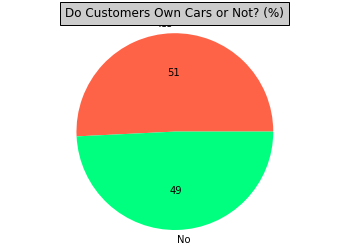

In [11]:
print(df.owns_car.value_counts(),"\n")

labels = (df['owns_car'].sort_values()).value_counts().keys().tolist()
counts = (df['owns_car'].sort_values()).value_counts().tolist()

figureObject, axesObject = plt.subplots()
axesObject.pie(counts, labels=labels, autopct='%1.0f', colors=['tomato','springgreen'])
axesObject.axis('equal')
plt.title("Do Customers Own Cars or Not? (%)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


# Customer Addresses

Now it's time to involve the second dataset.

## Removing Contradiction in States

Upon seeing the head of our dataset, we observe something strange. Some state names are written full while others are abbreviations. To investigate further, we can check the value counts. After checking the value counts, we realize that there's a contradition in state names. For instance, New South Wales and NSW is the same but are written separately. Same is the case with Victoria and VIC. Hence, we make the necessary replacements.

In [12]:
customerAddressDF = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name=4, skiprows=1)
print(customerAddressDF.state.value_counts(),"\n")
customerAddressDF["state"].replace({"New South Wales": "NSW", "Victoria": "VIC"}, inplace=True)

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64 



## Visualizing Purchases Based on States



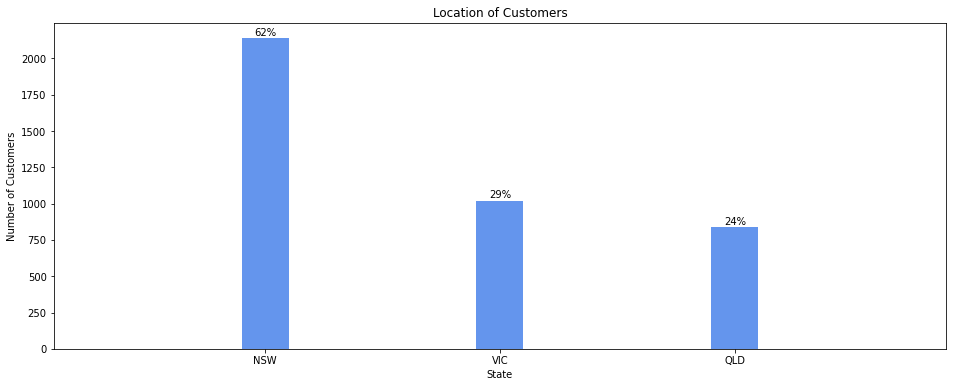

In [13]:
states = (customerAddressDF['state'].sort_values()).value_counts().keys().tolist()
counts = (customerAddressDF['state'].sort_values()).value_counts().tolist()

data = sorted(zip(states, counts), key=lambda v: v[1], reverse=True)

plt.figure(figsize=(16, 6))
for (i, c) in data: 
    bars = plt.bar(i, c, width=0.2, bottom=None, align='center', data=None, color='cornflowerblue')
    plt.annotate(f'{int((c/total)*100)}%\n', xy=(i, c), va='center', ha='center')
plt.xlim(-0.9, len(states) - 1 + 0.9)
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Location of Customers')
plt.show()

## Visualizing Purchases Based on States & Gender

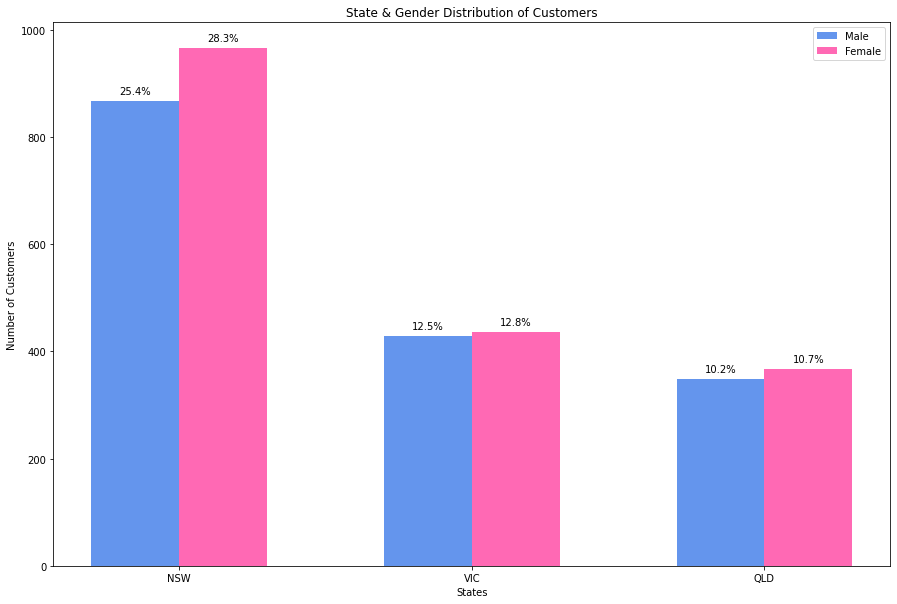

In [14]:
customerAddressDF = pd.merge(customerAddressDF, df, on='customer_id', how='inner')

maleNSW = 0
maleVIC = 0
maleQLD = 0

femaleNSW = 0
femaleVIC = 0
femaleQLD = 0

NSWData = customerAddressDF[customerAddressDF['state']=="NSW"]
VICData = customerAddressDF[customerAddressDF['state']=="VIC"]
QLDData = customerAddressDF[customerAddressDF['state']=="QLD"]


for value in NSWData['gender']:
   if(value=="F"):
    femaleNSW+=1
   else: 
    maleNSW += 1

for value in VICData['gender']:
   if(value=="F"):
    femaleVIC+=1
   else: 
    maleVIC += 1

for value in QLDData['gender']:
   if(value=="F"):
    femaleQLD+=1
   else: 
    maleQLD += 1

    
N = 3
labels = ['NSW','VIC', 'QLD']
male = (maleNSW, maleVIC, maleQLD)
female = (femaleNSW, femaleVIC, femaleQLD)
ind = np.arange(N)  
width = 0.30 

figure, axes = plt.subplots()
figure.set_size_inches(15, 10, forward=True)
plt.bar(ind, male , width, label='Male', color='cornflowerblue')
plt.bar(ind + width, female, width, label='Female', color='hotpink')

plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('State & Gender Distribution of Customers')

plt.xticks(ind + width / 2,  ('NSW','VIC', 'QLD'))

for p in axes.patches:
    axes.annotate(f'{np.round((p.get_height()/total)*100, decimals=1)}%',
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
    
plt.legend(loc='best')
plt.show()